In [1]:
#Prepping the notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# my custom helper functions
import helpers as hlp
import turtles
import scipy

#filter data: Naitive turle and relevant
print ("Filtering Natives ...")
natives = turtles.get_clean_data()
natives = natives[natives['Weight']!=0]
natives = natives[natives['Carapace']!=0]
natives = natives[natives['Plastron']!=0]
natives = natives[natives['Species']=='Cpb']
print ("Done")


Filtering Natives ...
Loading data /Users/kim/Projects/turtles-way-down/source/Turtle Data.xls
2008
2009
2010
2011
2012
2013
2014
Cleaning decimals ...
Cleaning other values ...
Loading data /Users/kim/Projects/turtles-way-down/source/MF Trapping Data.xlsx
Cleaning decimals ...
Cleaning other values ...
Done


In [2]:
#Show some data - basic metrics
natives[['Carapace','Plastron','Annuli','Weight']].describe()

,Carapace,Plastron,Annuli,Weight
count,803.000000,803.000000,803.000000,803.000000
mean,139.423157,131.802795,5.495641,466.428009
std,39.625729,38.688442,3.446914,363.096222
min,32.740002,29.730000,0.000000,7.050000
25%,109.485001,102.915001,4.000000,194.500000
50%,132.009995,123.779999,5.000000,312.000000
75%,174.785004,163.400002,7.000000,688.500000
max,216.380005,208.449997,20.000000,1435.000000


In [3]:
#Show some data - Gender, Location etc
natives[['Gender','Capture Location']].describe(include='all')

,Gender,Capture Location
count,803,803
unique,3,2
top,f,Gresham
freq,401,739


Plotting swarm plot with 803 samples...


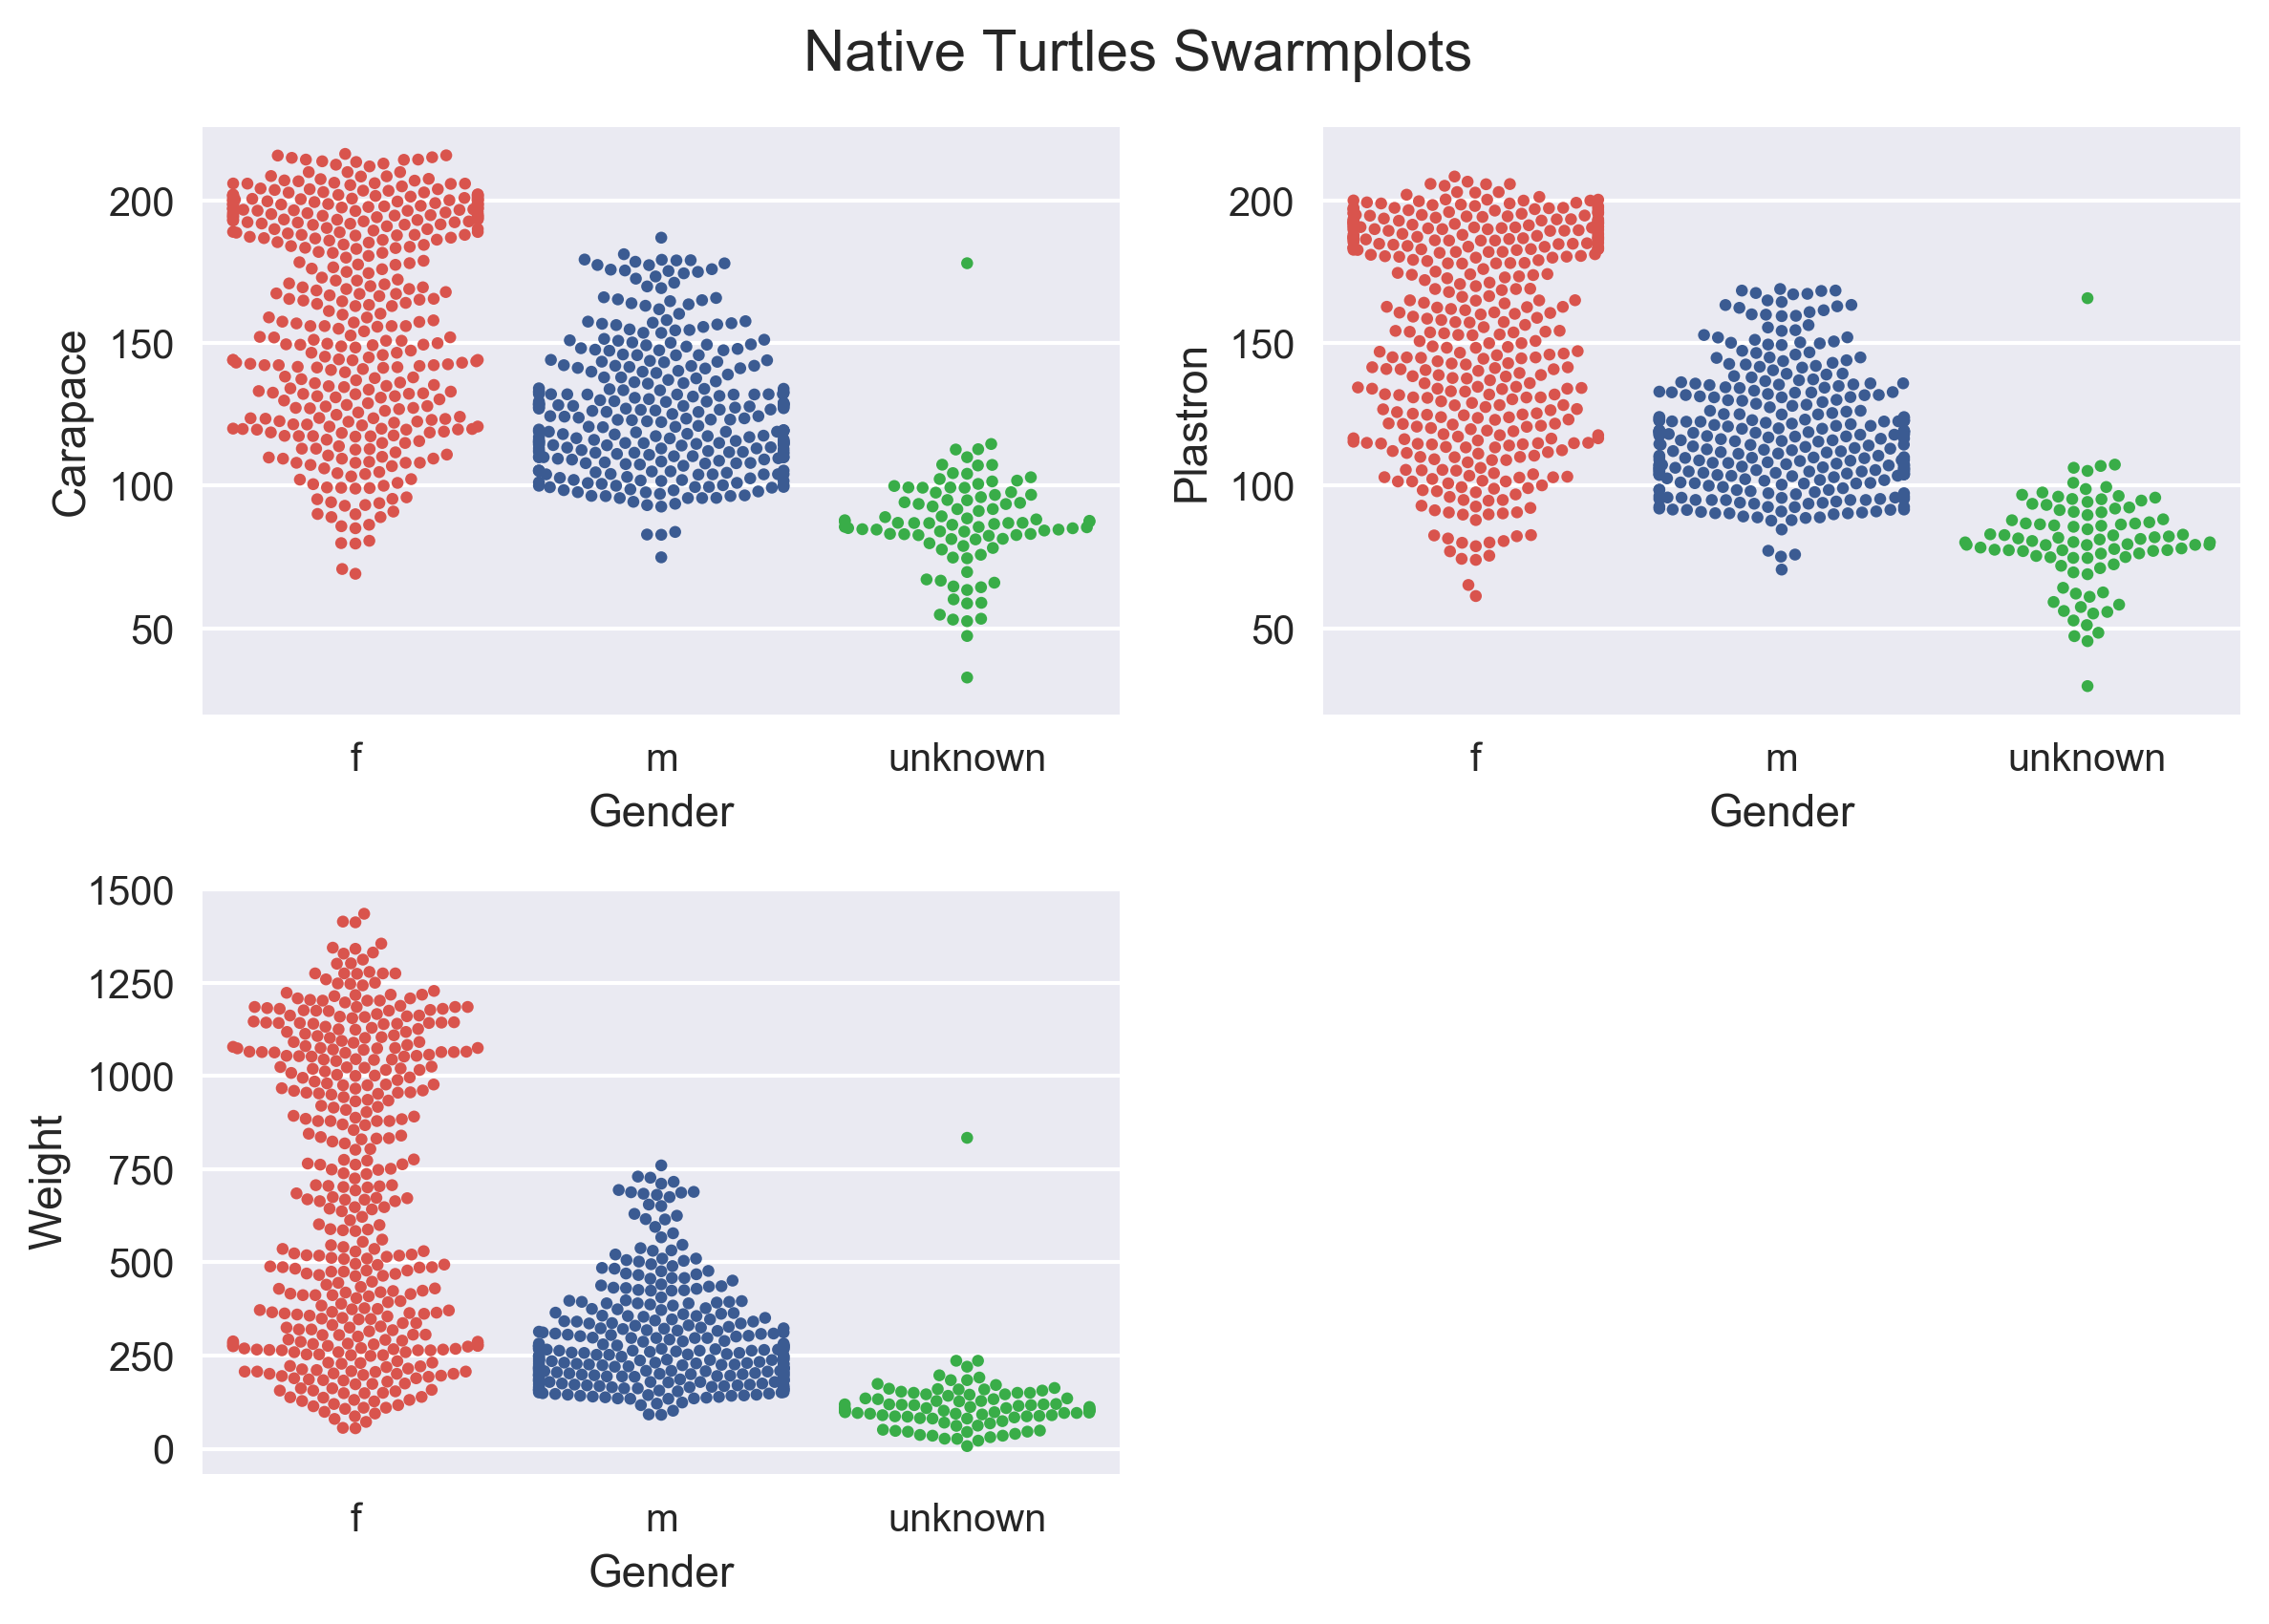

In [4]:
### Basic Swarmplot to show Carapace / Plastron / Weight by Gender
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]

print ("Plotting swarm plot with " + str(natives.Weight.count()) + ' samples...')
sns.set()
_ = plt.figure(1)
_ = plt.suptitle('Native Turtles Swarmplots ')

_1 =plt.subplot(2,2,1)
_ = sns.swarmplot(x='Gender', y='Carapace', data=natives,size=3,palette=colors)
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
_ = sns.swarmplot(x='Gender', y='Plastron', data=natives,size=3,palette=colors)
_ = plt.ylabel('Plastron')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_ = plt.subplot(2,2,3)
_ = sns.swarmplot(x='Gender', y='Weight', data=natives,size=3,palette=colors)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Weight')

Plotting Cumulative Distribution Function with 803 samples...


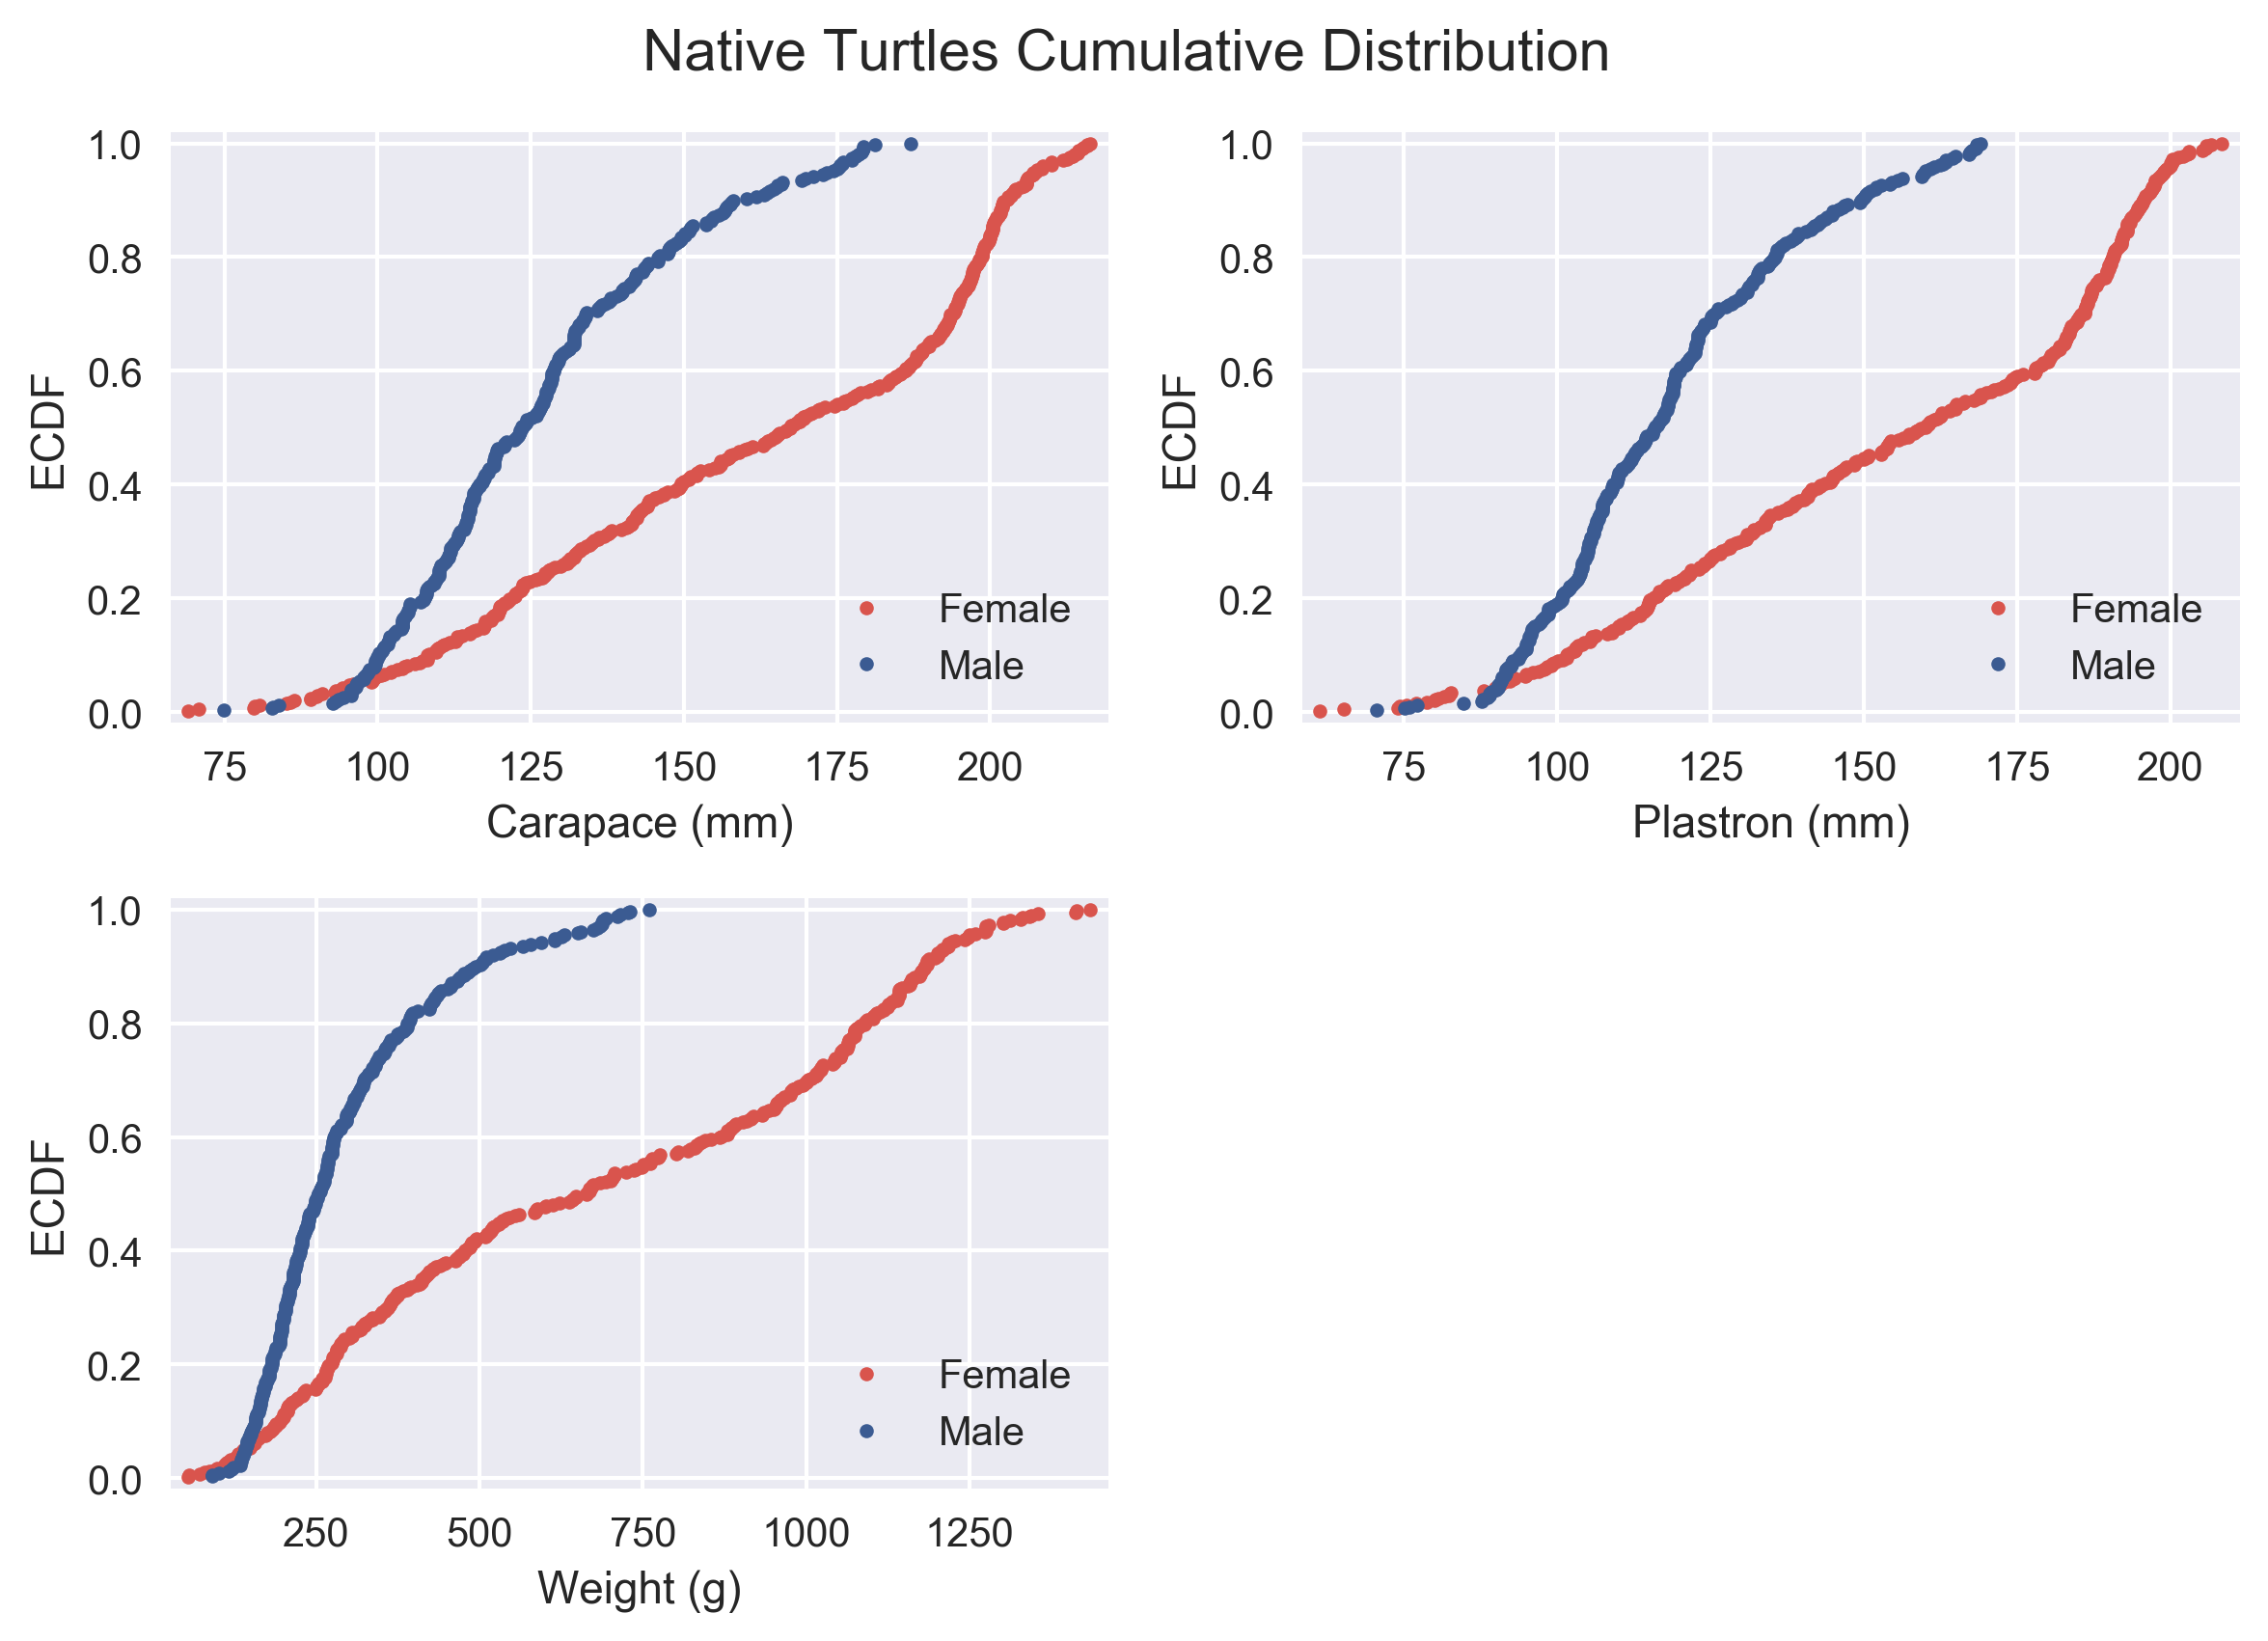

In [5]:
### Same information as beswars above just displayed as ECDFs
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue']]


print ("Plotting Cumulative Distribution Function with " + str(natives.Weight.count()) + ' samples...')
# Compute ECDFs

_ = plt.figure(2)
_ = plt.suptitle('Native Turtles Cumulative Distribution ')

x_CarapaceF, y_CarapaceF = hlp.ecdf(natives[natives['Gender']=='f']['Carapace'])
x_CarapaceM, y_CarapaceM = hlp.ecdf(natives[natives['Gender']=='m']['Carapace'])

_ = plt.subplot(2,2,1)
_ = plt.plot(x_CarapaceF, y_CarapaceF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_CarapaceM, y_CarapaceM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Carapace (mm)')
_ = plt.ylabel('ECDF')

x_PlastronF, y_PlastronF = hlp.ecdf(natives[natives['Gender']=='f']['Plastron'])
x_PlastronM, y_PlastronM = hlp.ecdf(natives[natives['Gender']=='m']['Plastron'])

_ = plt.subplot(2,2,2)
_ = plt.plot(x_PlastronF, y_PlastronF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_PlastronM, y_PlastronM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Plastron (mm)')
_ = plt.ylabel('ECDF')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

x_WeightF, y_WeightF = hlp.ecdf(natives[natives['Gender']=='f']['Weight'])
x_WeightM, y_WeightM = hlp.ecdf(natives[natives['Gender']=='m']['Weight'])

_ = plt.subplot(2,2,3)
_ = plt.plot(x_WeightF, y_WeightF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_WeightM, y_WeightM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Weight (g)')
_ = plt.ylabel('ECDF')

Plotting Histogram Weight, Carapace and Plastron with 320 samples...


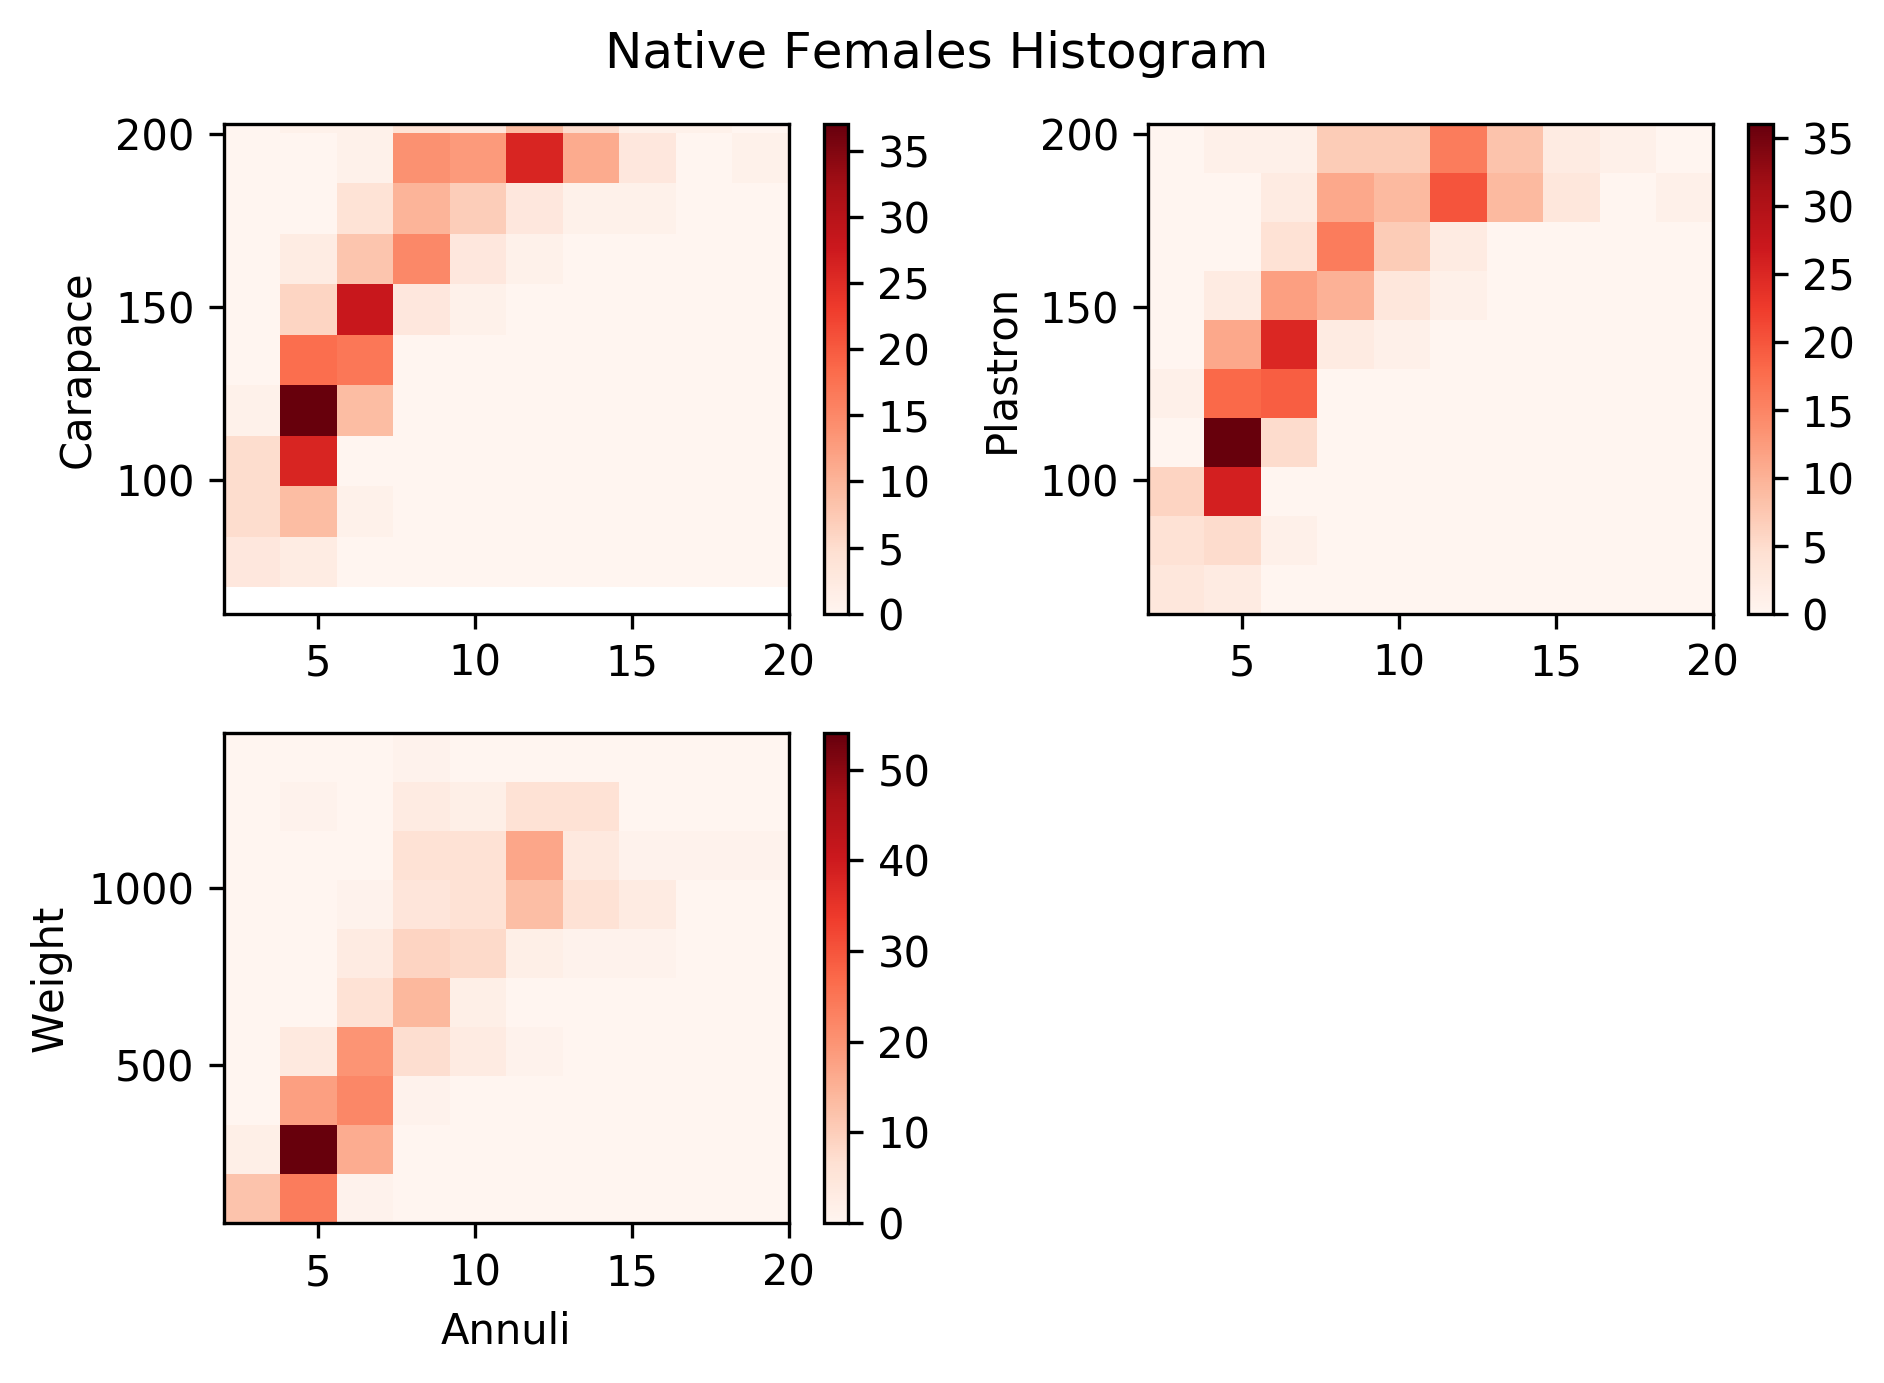

In [6]:
#2d histogram Carapace / Plastron / Weight - Females
sns.reset_orig()
#plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
## Lineplot Age + Weight, Carapace, Plastron

### FEMALE
females = natives[natives['Gender']=='f']
females = females[females['Annuli']!=0]
print ("Plotting Histogram Weight, Carapace and Plastron with " + str(females.Weight.count()) + ' samples...')

_ = plt.figure(3)
_1 =plt.subplot(2,2,1)

#_ = plt.scatter(females['Annuli'], females['Carapace'])
_ = plt.hist2d(females['Annuli'], females['Carapace'],cmap='Reds',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
#_ = plt.scatter(females['Annuli'],females['Plastron'])
_ = plt.hist2d(females['Annuli'], females['Plastron'],cmap='Reds',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Plastron')

_ = plt.suptitle('Native Females Histogram ')
_ = plt.subplot(2,2,3)
#_ = plt.scatter(females['Annuli'], females['Weight'],s=10)
_ = plt.hist2d(females['Annuli'], females['Weight'],cmap='Reds',bins=(10,10))
_ = plt.colorbar()
_ = plt.xlabel('Annuli')
_ = plt.ylabel('Weight')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Plotting Histogram Weight, Carapace and Plastron with 285 samples...


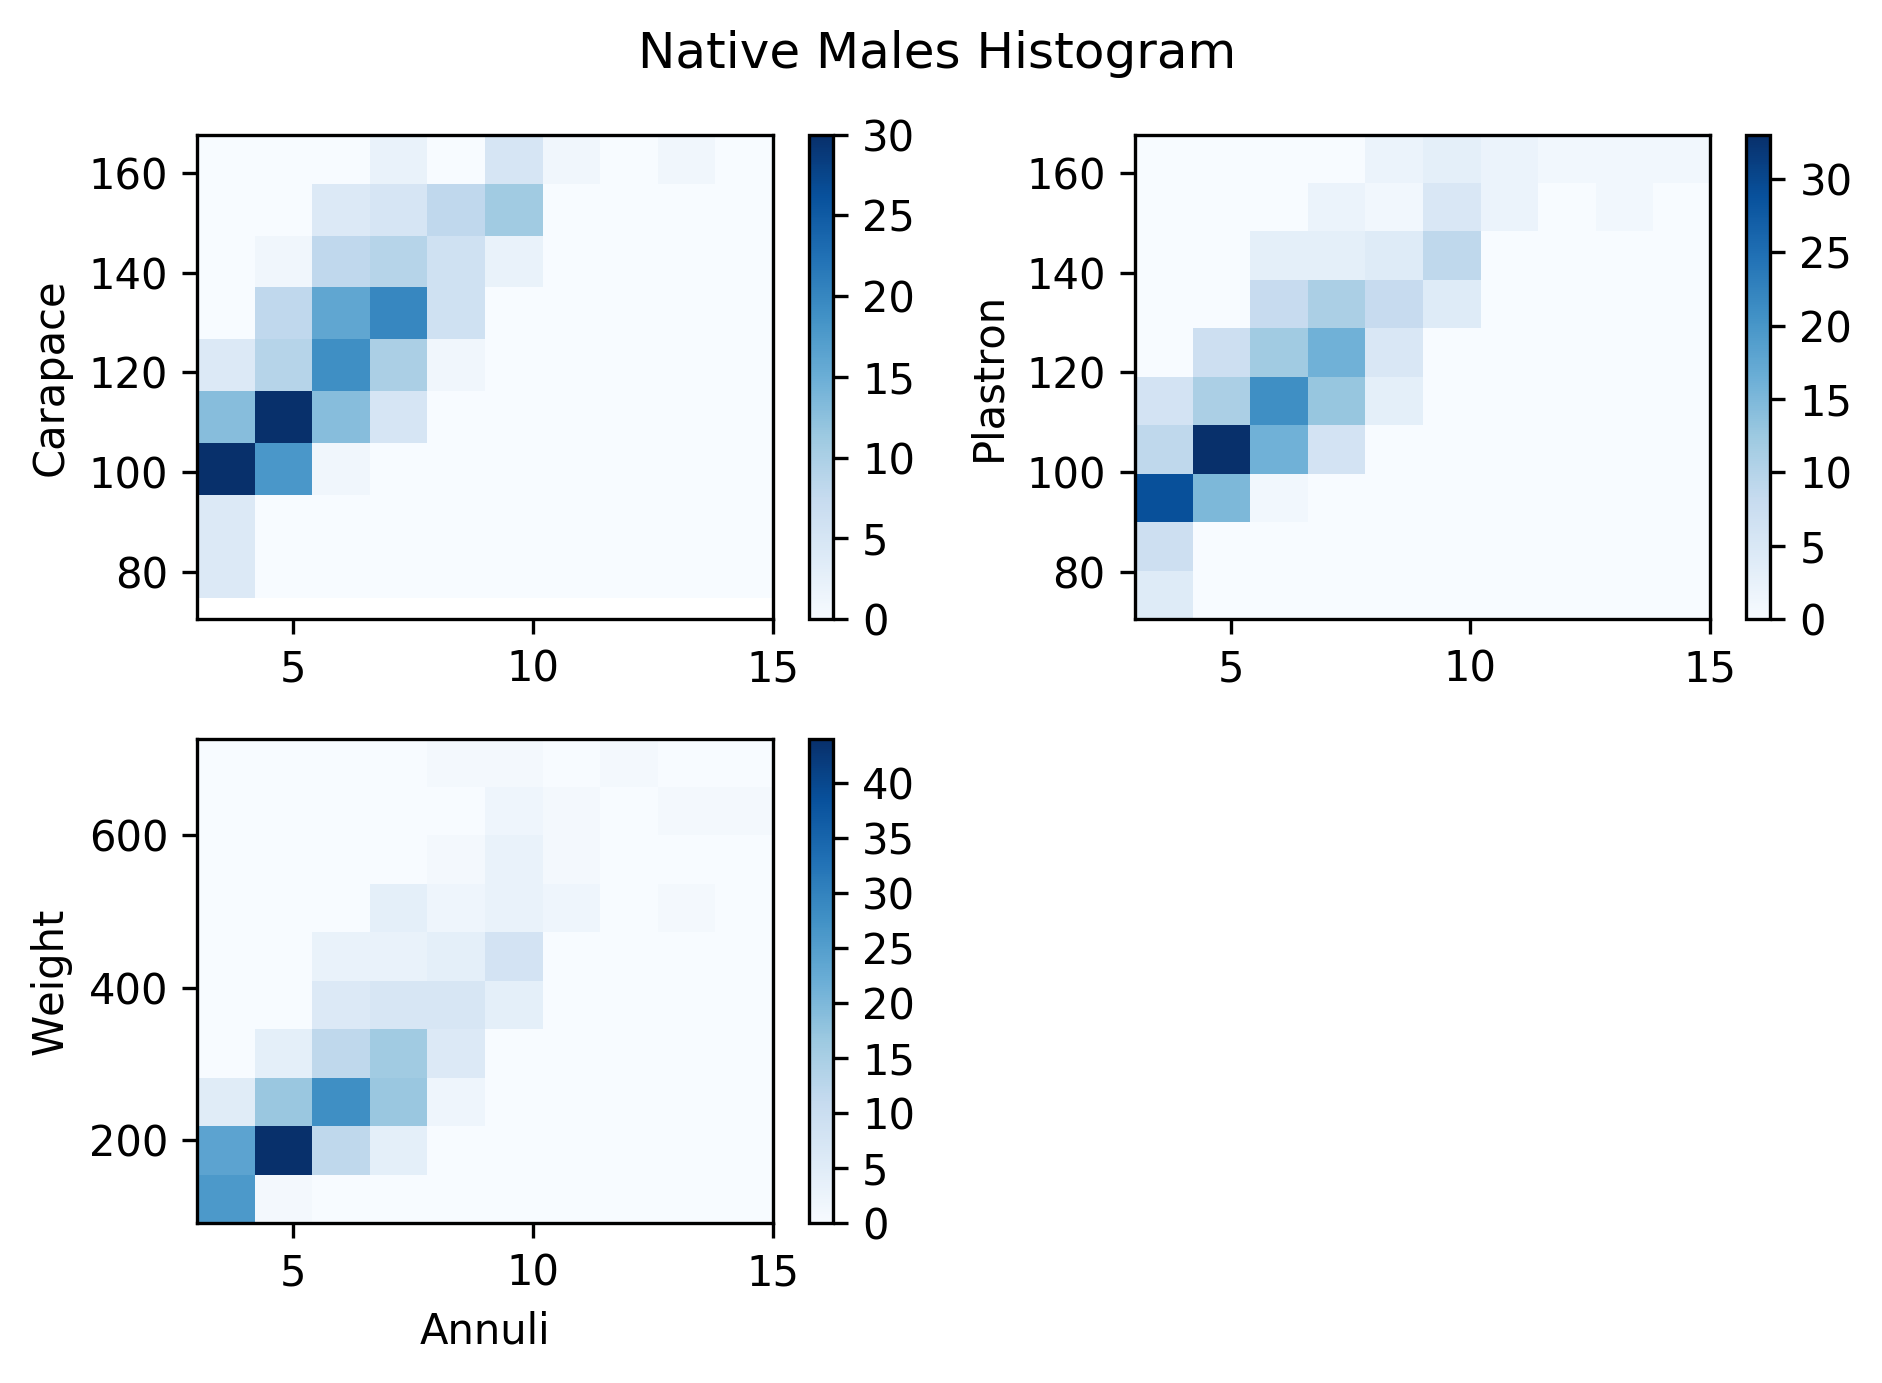

In [7]:
##2d histogram Carapace / Plastron / Weight - Males
sns.reset_orig()
#plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
## Lineplot Age + Weight, Carapace, Plastron

### MALE
males = natives[natives['Gender']=='m']
males = males[males['Annuli']!=0]
print ("Plotting Histogram Weight, Carapace and Plastron with " + str(males.Weight.count()) + ' samples...')

_ = plt.figure(3)

_1 =plt.subplot(2,2,1)
#_ = plt.scatter(males['Annuli'], males['Carapace'])
_ = plt.hist2d(males['Annuli'], males['Carapace'],cmap='Blues',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
#_ = plt.scatter(males['Annuli'],males['Plastron'])
_ = plt.hist2d(males['Annuli'], males['Plastron'],cmap='Blues',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Plastron')

_ = plt.suptitle('Native Males Histogram ')
_ = plt.subplot(2,2,3)
#_ = plt.scatter(males['Annuli'], males['Weight'],s=10)
_ = plt.hist2d(males['Annuli'], males['Weight'],cmap='Blues',bins=(10,10))
_ = plt.colorbar()
_ = plt.xlabel('Annuli')
_ = plt.ylabel('Weight')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Plotting swarm plot with hue with 693 samples...


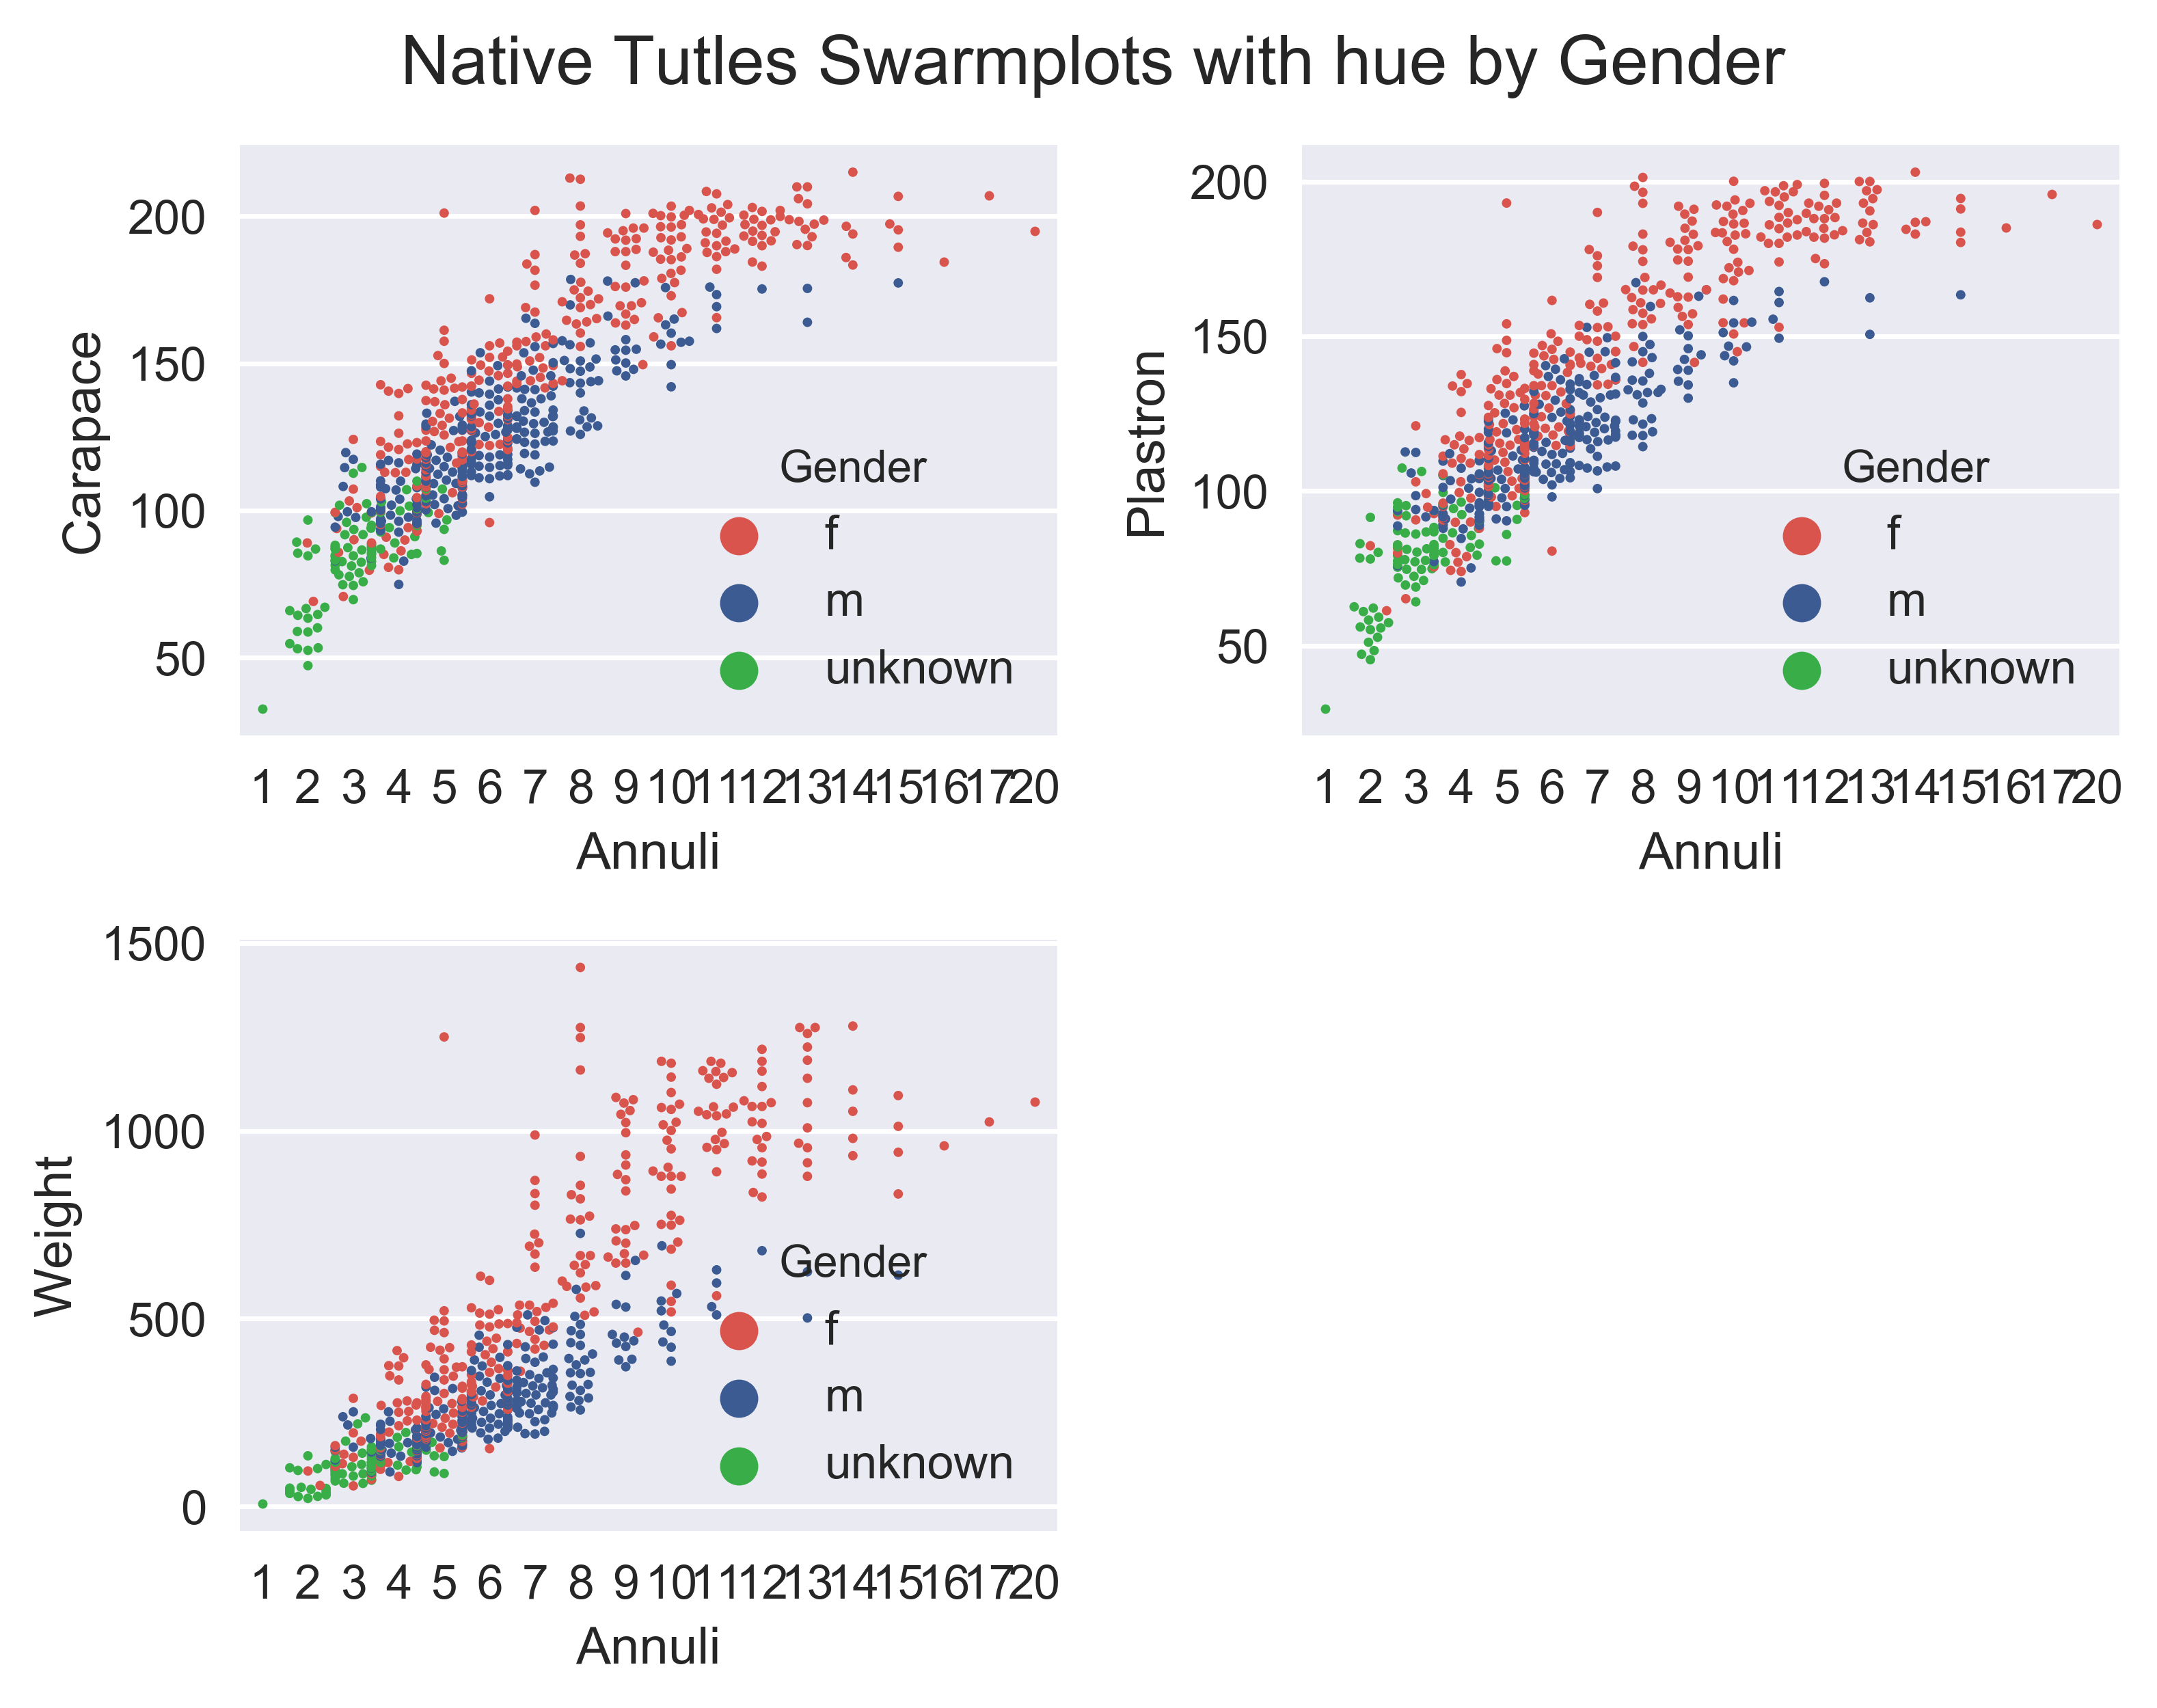

In [8]:
### Swarmplot with Hue (Keep this?)
natives = natives[natives['Annuli']!=0]

#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
colors = {'f':sns.xkcd_rgb['pale red'], 'm':sns.xkcd_rgb['denim blue'], 'unknown':sns.xkcd_rgb['medium green']}
plt.rcParams['figure.dpi'] = 500
print ("Plotting swarm plot with hue with " + str(natives.Weight.count()) + ' samples...')
sns.set()
_ = plt.figure(5)
_ = plt.suptitle('Native Tutles Swarmplots with hue by Gender')
_1 =plt.subplot(2,2,1)
#_ = plt.plot( 'Annuli', 'Carapace', data=natives, linestyle='', marker='o', markersize=0.7)
#_ = plt.scatter(natives['Annuli'],natives['Carapace'],s=10,c=natives['Gender'].apply(lambda x: colors[x]))
_ = sns.swarmplot(x='Annuli', y='Carapace', hue='Gender',data=natives,dodge=False,size=2,palette=colors)
#_ = sns.lmplot(x='Annuli', y='Carapace', hue='Gender',data=natives,size=2,palette=colors)
#_ = sns.stripplot(x='Annuli', y='Carapace', hue='Gender',data=natives,dodge=True,jitter=True,size=2,palette=colors)
_ = plt.ylabel('Carapace')

_2 = plt.subplot(2,2,2)
_ = sns.swarmplot(x='Annuli', y='Plastron', hue='Gender',data=natives,dodge=False,size=2,palette=colors)
_ = plt.ylabel('Plastron')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

_ = plt.subplot(2,2,3)
_ = sns.swarmplot(x='Annuli', y='Weight', hue='Gender',data=natives,dodge=False,size=2,palette=colors)
_ = plt.xlabel('Annuli')
_ = plt.ylabel('Weight')


In [9]:
### Swarmplot with Hue and Linnear regression (Keep this?)
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
natives = natives[natives['Annuli']!=0]
females = natives[natives['Gender']=='f']
males = natives[natives['Gender']=='m']
captureLocations = natives['Capture Location'].unique()
plt.rcParams['figure.dpi'] = 800

## regression calculation
def get_Linear_Regression_Stats(dataframe,x,y,GenderFilter,LocationFilter,echo=False):
 
    dataframe = dataframe[dataframe['Gender']==GenderFilter]
    dataframe = dataframe[dataframe['Capture Location']==LocationFilter]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataframe[x], dataframe[y])
    if echo:
        print( "%s / %s (Filter: %s + %s)" % (x,y,GenderFilter,LocationFilter))
        print('    slope     = %.2f' % slope)
        print('    intercept = %.2f' % intercept)
        print('    r_value   = %.2f' % r_value)
        print('    p_value   = %f' % p_value)
        print('    std_err   = %.2f' % std_err)
    return (slope, intercept, r_value, p_value, std_err)







Plotting swarm plot with hue and linear digression with 605 samples...


<Figure size 640x480 with 0 Axes>

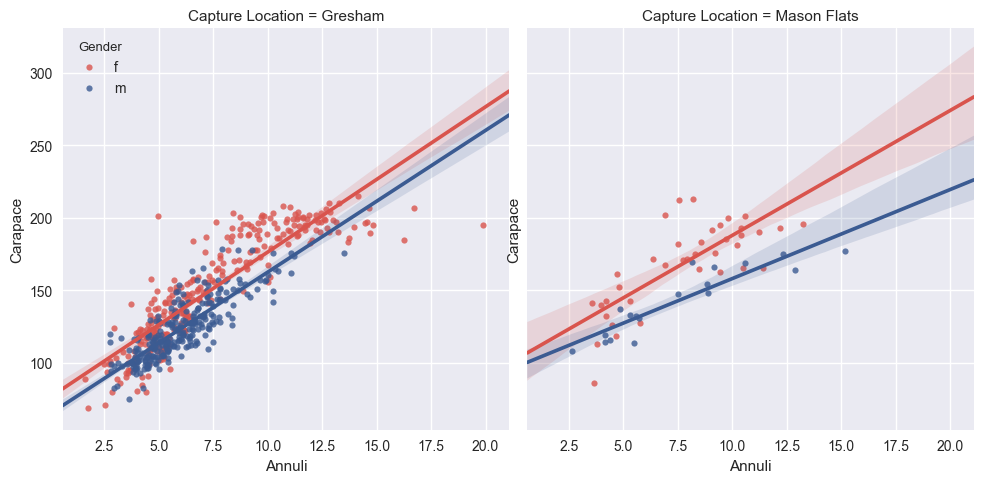

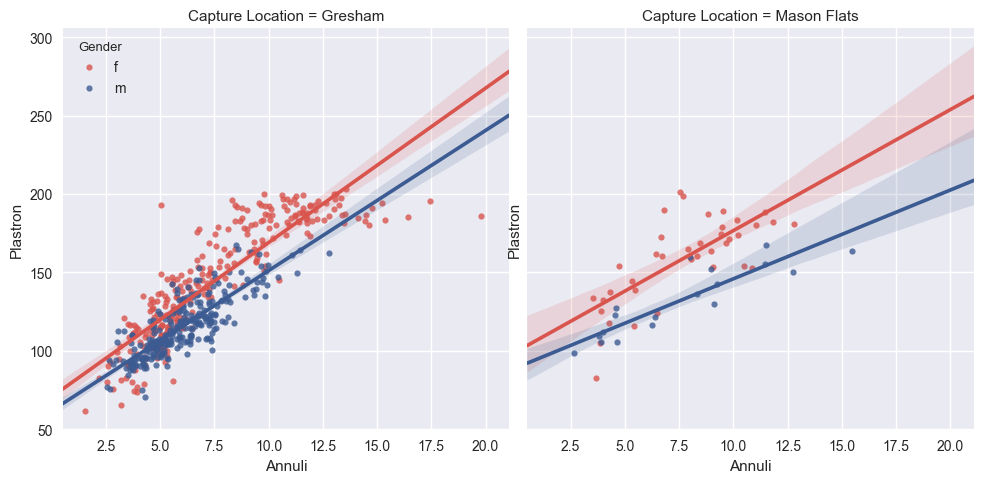

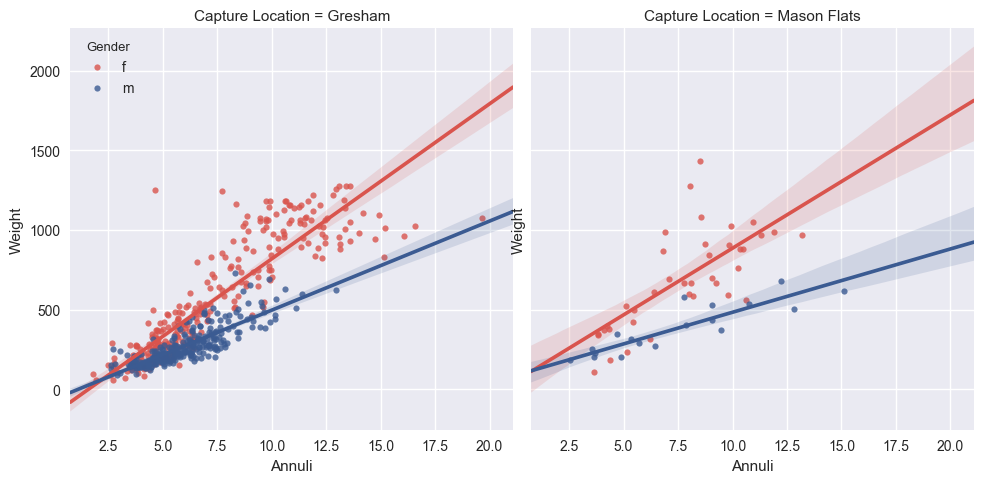

In [10]:
#sns.set()
import statsmodels
natives = natives[natives['Gender']!='unknown']
is_robust = False


### Swarmplot with Hue and Linear Digression 
natives = natives[natives['Annuli']!=0]
#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
colors = {'f':sns.xkcd_rgb['pale red'], 'm':sns.xkcd_rgb['denim blue'], 'unknown':sns.xkcd_rgb['medium green']}
plt.rcParams['figure.dpi'] = 100
print ("Plotting swarm plot with hue and linear digression with " + str(natives.Weight.count()) + ' samples...')
if (is_robust):
    print ("Estimating a robust regression. This will de-weight outliers. Tnis is substantially more computationally intensive")
sns.set()
_ = plt.figure(5)
_ = sns.lmplot(x='Annuli', y='Carapace', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
_ = plt.ylabel('Carapace')
_ = sns.lmplot(x='Annuli', y='Plastron', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
_ = plt.ylabel('Plastron')
_ = sns.lmplot(x='Annuli', y='Weight', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
_ = plt.ylabel('Weight')


In [11]:
# Print Regression Statistics
print('Linnear Regressions...')
for locations in captureLocations:
    for interestingValue in ['Carapace','Plastron','Weight']:
        for gender in ['f','m']:
            get_Linear_Regression_Stats(natives,'Annuli',interestingValue,gender,locations,True)


Linnear Regressions...
Annuli / Carapace (Filter: f + Gresham)
    slope     = 10.02
    intercept = 76.21
    r_value   = 0.88
    p_value   = 0.000000
    std_err   = 0.32
Annuli / Carapace (Filter: m + Gresham)
    slope     = 9.77
    intercept = 64.84
    r_value   = 0.84
    p_value   = 0.000000
    std_err   = 0.39
Annuli / Plastron (Filter: f + Gresham)
    slope     = 9.85
    intercept = 70.54
    r_value   = 0.88
    p_value   = 0.000000
    std_err   = 0.32
Annuli / Plastron (Filter: m + Gresham)
    slope     = 8.94
    intercept = 61.70
    r_value   = 0.83
    p_value   = 0.000000
    std_err   = 0.36
Annuli / Weight (Filter: f + Gresham)
    slope     = 97.48
    intercept = -156.55
    r_value   = 0.88
    p_value   = 0.000000
    std_err   = 3.09
Annuli / Weight (Filter: m + Gresham)
    slope     = 56.01
    intercept = -64.17
    r_value   = 0.83
    p_value   = 0.000000
    std_err   = 2.33
Annuli / Carapace (Filter: f + Mason Flats)
    slope     = 8.61
    interc

In [12]:
natives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 133
Data columns (total 31 columns):
Date                            605 non-null datetime64[ns]
ID                              605 non-null object
Time                            411 non-null object
Surveyor(s)                     547 non-null object
Weather                         291 non-null object
Capture Location                605 non-null object
Capture Method                  604 non-null object
Recapture                       605 non-null object
Species                         605 non-null object
Gender                          605 non-null object
Annuli                          605 non-null int8
Weight                          605 non-null float32
Carapace                        605 non-null float32
Plastron                        605 non-null float32
Gravid                          346 non-null object
Nest#                           13 non-null object
Nest Site                       15 non-null object
Marg